<a href="https://colab.research.google.com/github/pttrupt/PracticeProjects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 

In [189]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

#### Download the Dataset 

In [190]:
from urllib.request import urlretrieve

In [191]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f9405bd8490>)

#### Read the Dataset

In [192]:
import numpy as np
import pandas as pd 

In [193]:
df = pd.read_csv('medical.csv')

In [194]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [195]:
df.shape

(1338, 7)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Numerical columns: age , bmi, children, charges 
- Categorical columns: sex, smoker, region 

we can see that none of the columns contains miising values in this dataset.

In [197]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Looks like column `age`, `bmi` follows the normal distribution. ( Needs to verify)
- `charges` column follows (right) skewed distribution because mean > median and also there is quite big jump between 75% percentile (16639.91) and maximum value (63770.43) of column which suggest that there are some outliers. (Needs to verfiy with graphs)

### Exploratory Data Analysis and Visualization 

In [198]:
! pip install plotly -q

###### Import Libraries for Visualization 

In [199]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
%matplotlib inline 

In [200]:
### set the pictorial style parameters
plt.style.use("fivethirtyeight")

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Age 

- Age varies between 18 to 64
- Distribution is fairly uniform except for age 18 and 19.
- Dataset contain twice customer of age 18 and 19 compare to the other ages. (provide reason)

In [201]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [202]:
fig = px.histogram(df, x='age', marginal='box',
                   nbins=47,title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

##### Body Mass Index 

 <center> $ BMI = \dfrac{Weight(Kg)}{(Height(m))^2}$ <center>
    

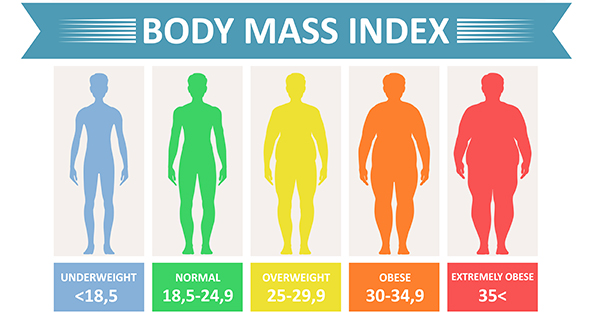
<center>Source: cdc.gov<center>

In [203]:
fig = px.histogram(df, x='bmi', marginal='box',
                  title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

- As graph suggests that `bmi` follows the approximately normal distribution.
- `bmi` column has few outliers which are extremely obese.
- Most of customers has bmi index between 25 and 35.

##### Charges 

In [204]:
fig = px.histogram(df, x='charges', 
                  marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey']
                   ,title='Annual Medical Charges with Smoker')

fig.update_layout(bargap=0.1)
fig.show()

- `charges` columns follows power law distribution.
- There are some customer whose Annual medical charges are more than $40K$. 



* Non-Smoker:
   - Non-smoker customers has lower annual medical charges than the smoker customer.
   - Most of the non-smoker customer customer has medical charges between $4K$ and $11K$ and there are still non-smoker customers whose medical charges are between $20K$ and $30K$ (Find an Explanation) and there are few outliers as well.
   
   
* Smoker:
   - Smoker customers seems to have more annual medical charges due to smoking habit or some oher reasons.
   - Two types customer cluster can be seen in the distribution. One whose medical charges are mostly between $14K$ and $26K$ and second has between $32K$ and $50K$. 

In [205]:
fig = px.histogram(df, x='charges', 
                   marginal='box', 
                   color='sex',
                   title='Annual Medical Charges with Sex')
fig.update_layout(bargap=0.1)
fig.show()

- Not much information can be gain from the `sex` column regrading annual medical charges of customers because there are kind of evenly distributed.<br/>
  (Need to verify by total medical charges per sex)

In [206]:
fig = px.histogram(df, x='charges', 
                  marginal='box',
                  color='region')
fig.update_layout(bargap=0.1)
fig.show()

##### Smoker

In [207]:
smoker_count = df.smoker.value_counts()
smoker = pd.DataFrame([smoker_count, round(smoker_count*100/len(df), 2)], 
            index=['count', 'percentage'])
smoker

,no,yes
count,1064.00,274.00
percentage,79.52,20.48


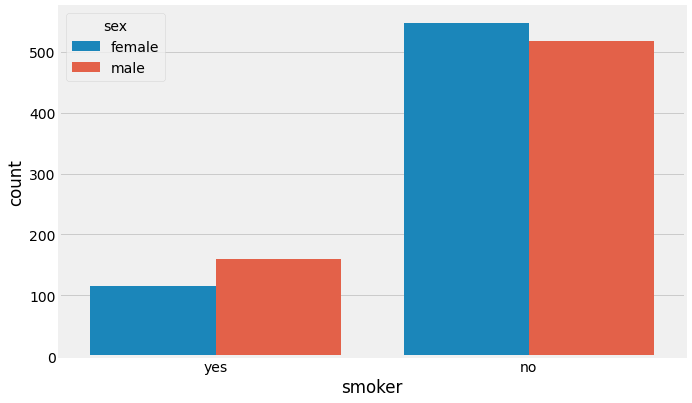

In [208]:
sns.countplot(x='smoker', hue='sex', data=df)

-  Aorund 80% (1064) of customers in dataset are non-smoker, 20%(274) are smoker. 
-  It appears that smoking is more common in male.

##### Sex 

In [209]:
sex_count = df.sex.value_counts()
sex = pd.DataFrame([sex_count, round(sex_count*100/len(df), 2)], 
                  index=['count', 'percentage'])
sex

,male,female
count,676.00,662.00
percentage,50.52,49.48


- Fairly even number of male and female customer in dataset

##### Region 

In [210]:
region_count = df.region.value_counts()
region_count

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

- Each region has eqaul amount of customers except sountwest region. It has 364 customers and others has 325.

##### Children 

In [211]:
children_count = df.children.value_counts()
children_count

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

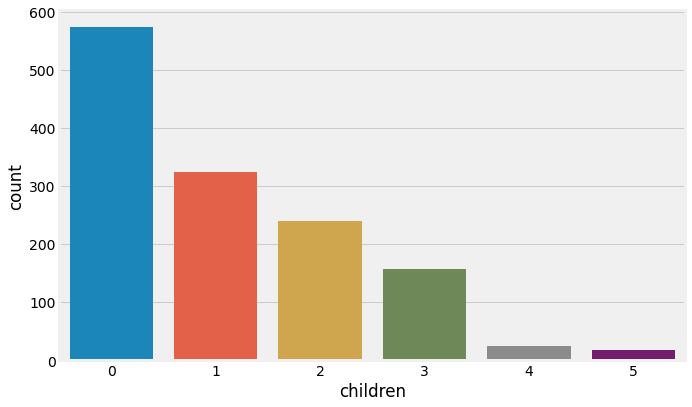

In [212]:
sns.countplot(x='children', data=df);

##### Age and Charges

In [213]:
fig = px.scatter(df, x='age', y='charges', color='smoker',
                opacity=0.8, hover_data=['sex'],
                title='Age vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

- General trend seems like medical charges increase with age.

- We can see three types clusters, each of which seems to form a linear relationship with charges.
     1. The first and the largest culster consists non-smoker whose medical charges are low xompared to others.
     
     2. Second cluster contains both types of customers interms of smoking.
     
     3. Final cluster consists exculsively of smokers, and they have very high annual medical charges.  

##### BMI and Charges 

In [214]:
fig = px.scatter(df, x='bmi', y='charges',
                color='smoker', 
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

- It seems that `bmi` column does not have any kind of tred with `charges` column.
- Although for smoker customer, charges are very high if bmi > 30.

##### Region vs Charges 

In [215]:
px.box(df, x='region', y='charges',
      title='Region vs Charges')

##### Children vs Charges

In [216]:
px.violin(df, x='children', y='charges',
          title="Children vs Charges")

##### Correlation 

In [217]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


- from all numerical columns in dataset, `age` column is more closely related with charges then other columns.
- correlation coefficient between this two column is around 0.3.

In [218]:
# convert smoker column into numeric column 
smoker_numeric = df.smoker.astype('category').cat.codes
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int8

In [219]:
df.charges.corr(smoker_numeric)

0.787251430498478

- It appers that smoker column is highly co-related with charges.

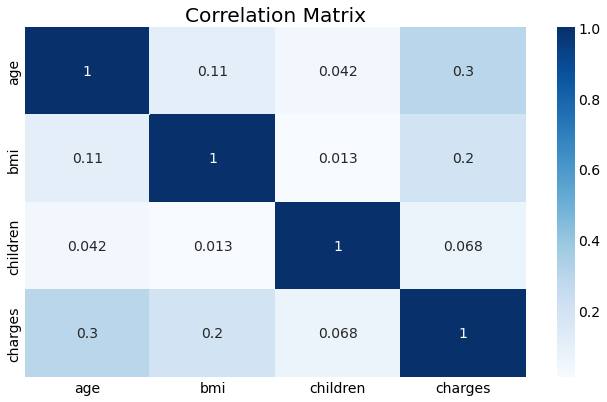

In [220]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title("Correlation Matrix");

### Linear Regression (All Features)

In [236]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [238]:
df['sex_code'] = df.sex.astype('category').cat.codes #### mapping female : 0 and male : 1 
df['smoker_code'] = df.smoker.astype('category').cat.codes #### mapping non-smoker : 0 and smoker : 1

In [239]:
region_codes = pd.get_dummies(df['region'])
coded_df = pd.concat([df, region_codes], axis=1)

In [241]:
columns = ['sex', 'smoker', 'region']
coded_df.drop(columns=columns, inplace=True)

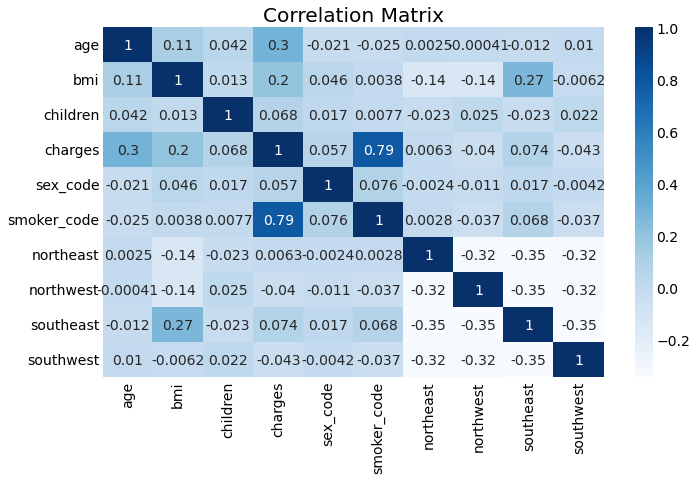

In [243]:
sns.heatmap(coded_df.corr(), cmap='Blues', annot=True)
plt.title("Correlation Matrix");

In [244]:
#### Independent Variable and Dependent Variable 
X = coded_df.drop(columns=['charges'])
y = coded_df.charges

In [245]:
#### train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [246]:
### Linear Regression model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [247]:
model.coef_, model.intercept_

(array([ 2.53700500e+02,  3.35962814e+02,  4.36910121e+02, -1.54637279e+01,
         2.36050173e+04,  4.83840068e+02,  2.23707336e+02, -4.29438766e+02,
        -2.78108638e+02]), -12311.91360565046)

In [248]:
pred_test = model.predict(X_test)

In [249]:
print("RMSE loss:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("R2 score:", r2_score(y_test, pred_test)*100)

RMSE loss: 5641.626558850189
R2 score: 79.99876970680434


### Linear Regression (All Feature) (Smoker) :( 1

In [330]:
smoker_df = coded_df[coded_df.smoker_code == 1].drop(columns=['smoker_code'])

In [332]:
### Independent Variable and Dependent Variable 

smoker_X = smoker_df.drop(columns=['charges'])
smoker_y = smoker_df.charges

In [334]:
### train test split 
sm_X_train, sm_X_test, sm_y_train, sm_y_test = train_test_split(smoker_X, smoker_y,
                                                                test_size=0.2, random_state=0)

In [336]:
### Linear Regression Model for smoker 

smoker_model = LinearRegression()
smoker_model.fit(sm_X_train, sm_y_train)

LinearRegression()

In [338]:
smoker_pred = smoker_model.predict(sm_X_test)

In [339]:
smoker_model.coef_, smoker_model.intercept_

(array([  275.97070077,  1463.67542172,   151.27644749,   -42.85876329,
          622.94579309,   476.45233605, -1410.28441716,   310.88628802]),
 -23771.75675729721)

In [343]:
print("RMSE Loss:", np.sqrt(mean_squared_error(sm_y_test, smoker_pred)))
print("R2 score *100:", r2_score(sm_y_test, smoker_pred)*100)

RMSE Loss: 5895.987864041825
R2 score *100: 74.5692468534542


In [348]:
#### Weights DataFrame
smoker_weights= pd.DataFrame({'feature':np.append(sm_X_train.columns, 'intercept'), 
                           'weights':np.append(smoker_model.coef_, smoker_model.intercept_)})
smoker_weights

,feature,weights
0,age,275.970701
1,bmi,1463.675422
2,children,151.276447
3,sex_code,-42.858763
4,northeast,622.945793
5,northwest,476.452336
6,southeast,-1410.284417
7,southwest,310.886288
8,intercept,-23771.756757


### Linear Regression (All Feature) (Non-Smoker) :) 0

In [359]:
non_smoker_df = coded_df[coded_df.smoker_code == 0].drop(columns=['smoker_code'])

In [360]:
non_smoker_df.shape

(1064, 9)

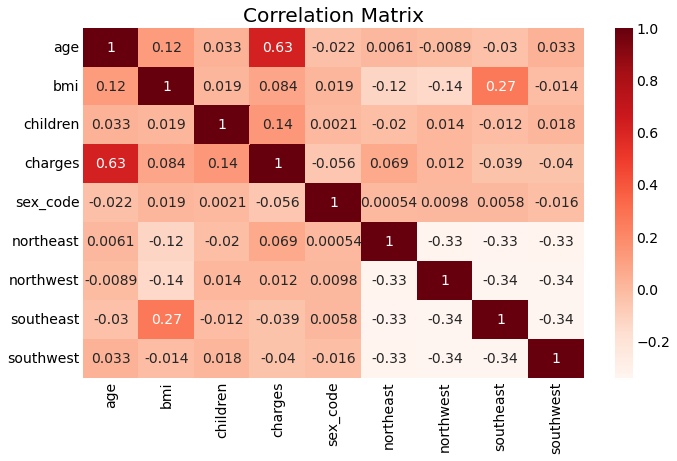

In [361]:
sns.heatmap(non_smoker_df.corr(), cmap='Reds', annot=True)
plt.title("Correlation Matrix");

In [362]:
### Independent Variable and Dependent Variable 

non_smoker_X = non_smoker_df.drop(columns=['charges'])
non_smoker_y = non_smoker_df.charges

In [363]:
### train test split 
nsm_X_train, nsm_X_test, nsm_y_train, nsm_y_test = train_test_split(non_smoker_X, non_smoker_y,
                                                                test_size=0.2, random_state=0)

In [364]:
### Linear Regression Model for smoker 

non_smoker_model = LinearRegression()
non_smoker_model.fit(nsm_X_train, nsm_y_train)

LinearRegression()

In [365]:
non_smoker_pred = non_smoker_model.predict(nsm_X_test)

In [366]:
non_smoker_model.coef_, non_smoker_model.intercept_

(array([ 263.32844305,   26.41509154,  633.64705864, -574.80274961,
         583.31856816,   22.7393295 , -171.36035407, -434.6975436 ]),
 -3253.939791202418)

In [367]:
print("RMSE Loss:", np.sqrt(mean_squared_error(nsm_y_test, non_smoker_pred)))
print("R2 score *100:", r2_score(nsm_y_test, non_smoker_pred)*100)

RMSE Loss: 5160.760950917998
R2 score *100: 35.242690483631215


In [368]:
#### Weights DataFrame
non_smoker_weights= pd.DataFrame({'feature':np.append(nsm_X_train.columns, 'intercept'), 
                           'weights':np.append(non_smoker_model.coef_, non_smoker_model.intercept_)})
non_smoker_weights

,feature,weights
0,age,263.328443
1,bmi,26.415092
2,children,633.647059
3,sex_code,-574.802750
4,northeast,583.318568
5,northwest,22.739330
6,southeast,-171.360354
7,southwest,-434.697544
8,intercept,-3253.939791


### SGDRegressor (All Feature)

In [283]:
### Feature scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [285]:
#### Independent Variable and Dependent Variable 

X_sgd = coded_df.drop(columns=['charges'])
y_sgd = coded_df.charges

In [286]:
#### train test split 
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X_sgd, y_sgd, test_size=0.2, random_state=0)

In [296]:
#### Feature Scaling 
scaler = StandardScaler()
train_abc = scaler.fit_transform(s_X_train[['age', 'bmi', 'children']])
test_abc = scaler.fit_transform(s_X_test[['age', 'bmi', 'children']])

In [297]:
s_train_abc = pd.DataFrame(train_abc, columns=['s_age', 's_bmi', 's_children'],
                               index = s_X_train.index)
s_test_abc = pd.DataFrame(test_abc, columns=['s_age', 's_bmi', 's_children'],
                               index = s_X_test.index)

In [298]:
scaled_X_train = pd.concat([s_X_train, s_train_abc], axis=1)
scaled_X_test = pd.concat([s_X_test, s_test_abc], axis=1)

In [301]:
scaled_X_train.drop(columns=['age', 'bmi', 'children'], inplace=True)
scaled_X_test.drop(columns=['age', 'bmi', 'children'], inplace=True)

In [ ]:
scaled_X_train

In [ ]:
scaled_X_test

In [ ]:
SGDRegressor().get_params()

In [313]:
params = {'eta0':[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30,], 
          'max_iter':[50, 100, 500, 1000], 
          'learning_rate':['constant', 'optimal', 'innscaling', 'adaptive']}
grid = GridSearchCV(SGDRegressor(loss='huber', penalty=None), params, n_jobs=-1, cv=10)

In [ ]:
grid.fit(scaled_X_train, s_y_train)

In [ ]:
grid.best_params_

In [ ]:
#### SGDRegressor 
sgd_model = SGDRegressor(loss='huber', penalty=None,
                         eta0=10, learning_rate='adaptive',
                         max_iter=500)
sgd_model.fit(scaled_X_train, s_y_train)

In [317]:
sgd_pred = sgd_model.predict(scaled_X_test)

In [ ]:
print("RMSE loss:", np.sqrt(mean_squared_error(s_y_test, sgd_pred)))
print("R2 score:", r2_score(s_y_test, sgd_pred)*100)

In [ ]:
### weights of each features
weights_df = pd.DataFrame({'feature':np.append(scaled_X_train.columns,'intercept'),
              'weights':np.append(sgd_model.coef_, sgd_model.intercept_)})
weights_df.sort_values(by='weights', ascending=False)